# Problem Statement

# Importing Libraries

In [1]:
# pip install pandas-profiling

In [2]:
# pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime 
import random
# from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OrdinalEncoder,RobustScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

# Data Gathering

### Bitcoin Datset 

In [4]:
df_bitcoin = pd.read_csv("coin_Bitcoin.csv")
df_bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
df_bitcoin.shape

(2991, 10)

### Cardano Dataset

In [6]:
df_cardano = pd.read_csv("coin_Cardano.csv")
df_cardano.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [7]:
df_cardano.shape

(1374, 10)

### Dogecoin Dataset

In [8]:
df_dogecoin = pd.read_csv("coin_Dogecoin.csv")
df_dogecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [9]:
df_dogecoin.shape

(2760, 10)

### Ethereum Dataset 

In [10]:
df_ethereum = pd.read_csv("coin_Ethereum.csv")
df_ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [11]:
df_ethereum.shape

(2160, 10)

### Concatenating above four dataset by using pandas 

In [12]:
df = pd.concat([df_bitcoin,df_cardano,df_dogecoin,df_ethereum],ignore_index=True)
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [13]:
df.shape

(9285, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9285 entries, 0 to 9284
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        9285 non-null   int64  
 1   Name       9285 non-null   object 
 2   Symbol     9285 non-null   object 
 3   Date       9285 non-null   object 
 4   High       9285 non-null   float64
 5   Low        9285 non-null   float64
 6   Open       9285 non-null   float64
 7   Close      9285 non-null   float64
 8   Volume     9285 non-null   float64
 9   Marketcap  9285 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 725.5+ KB


In [15]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [16]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

### Name

In [17]:
df["Name"].value_counts()

Bitcoin     2991
Dogecoin    2760
Ethereum    2160
Cardano     1374
Name: Name, dtype: int64

## Feature Engineering and EDA

In [18]:
df["Date"]=pd.to_datetime(df["Date"])

In [19]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [20]:
df.drop(["SNo","Symbol"],axis=1,inplace=True)

In [21]:
df["Name"].unique()

array(['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum'], dtype=object)

# Data Analysis

### Function to get Outlier detection by boxplot and distribution of Features

In [22]:
def get_distribution_outlier(col):
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

### Bitcoin price over Years

In [23]:
df_bt = df[df["Name"]=="Bitcoin"]
df_bt.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,Bitcoin,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,Bitcoin,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,Bitcoin,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,Bitcoin,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [24]:
df_bt.set_index('Date', inplace=True) # Set date column as the index

In [25]:
df_bt.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


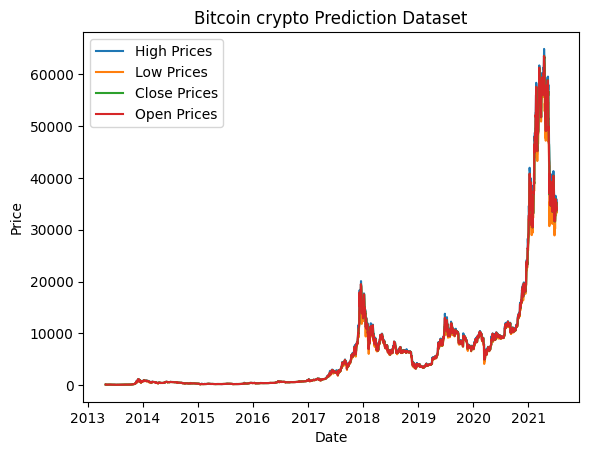

In [26]:
plt.plot(df_bt["High"], label='High Prices')
plt.plot(df_bt["Low"], label='Low Prices')
plt.plot(df_bt["Open"], label='Close Prices')
plt.plot(df_bt["Close"], label='Open Prices')
plt.title('Bitcoin crypto Prediction Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

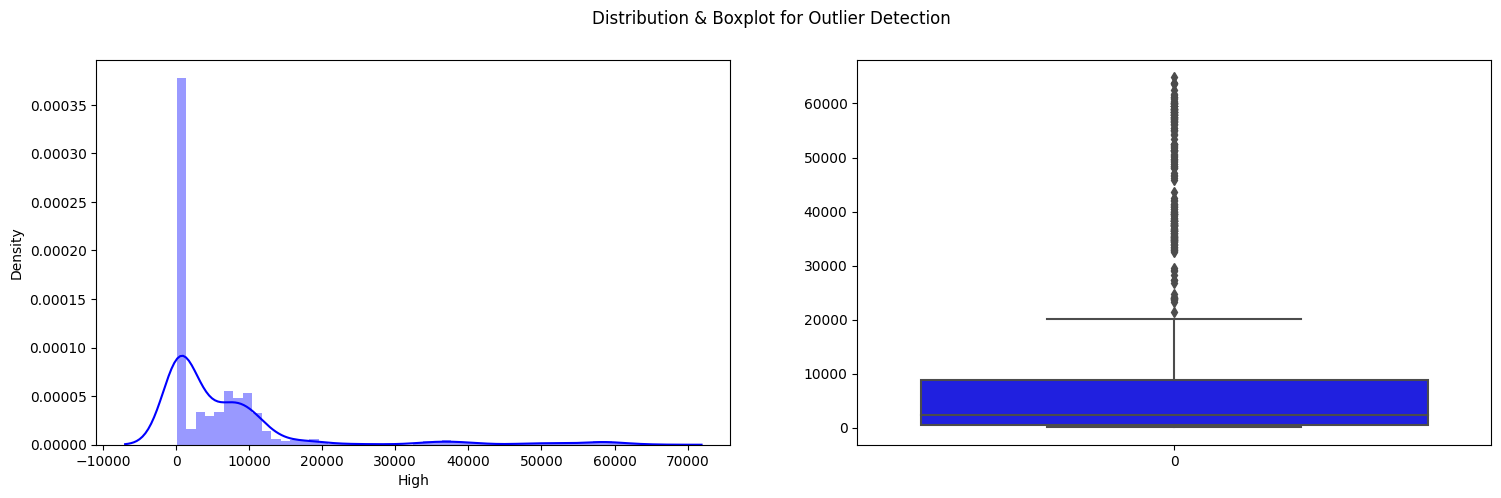

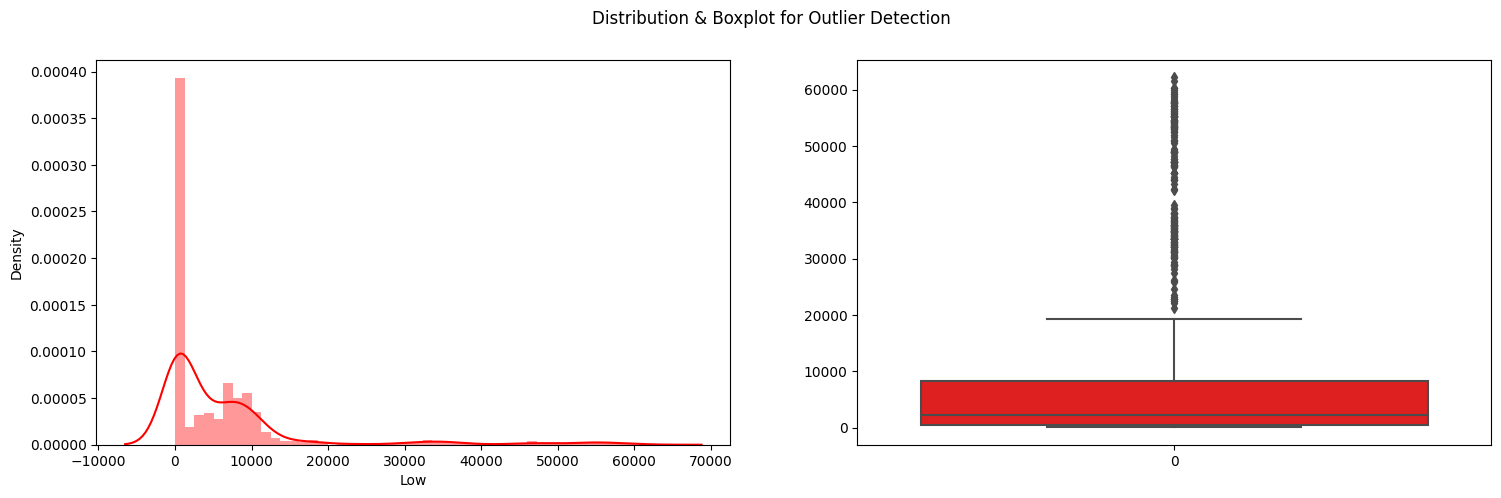

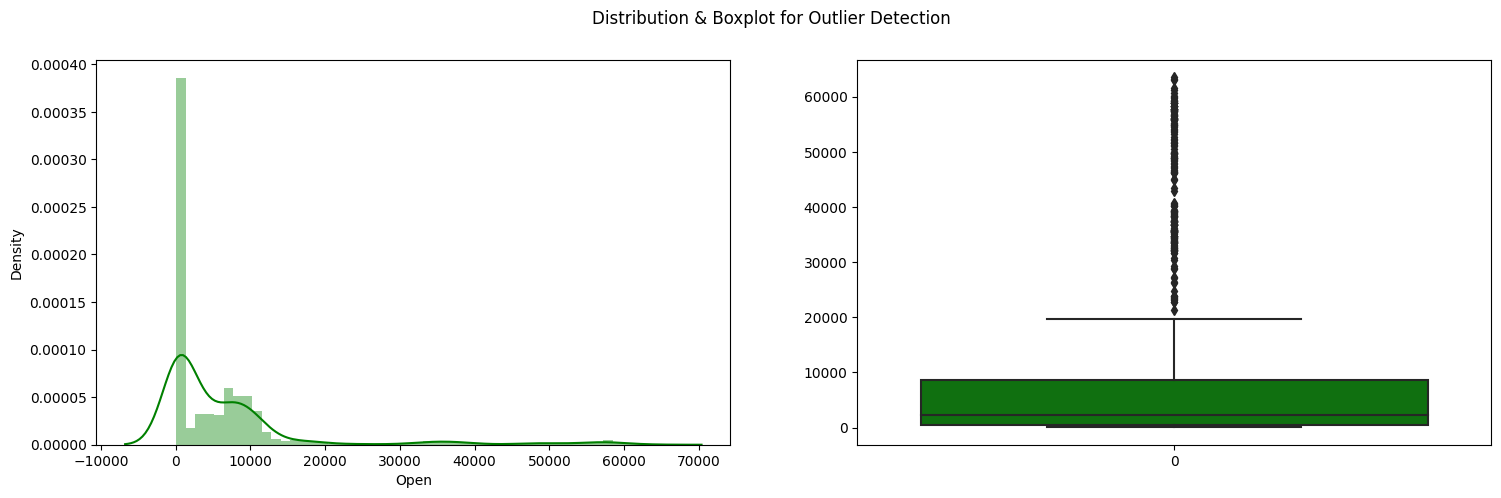

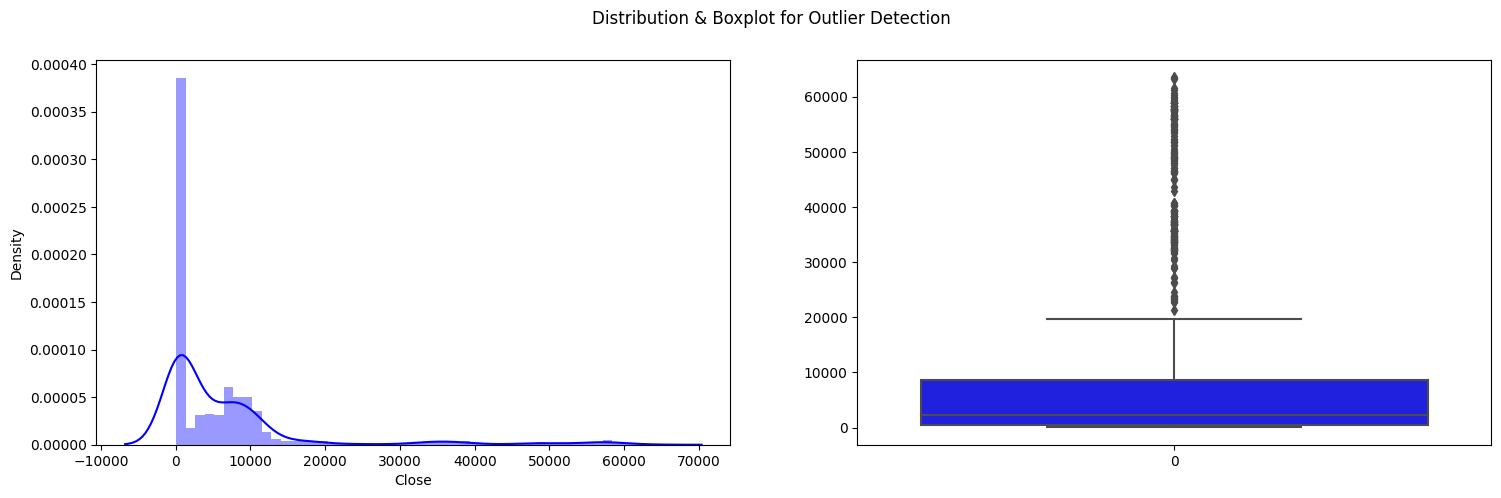

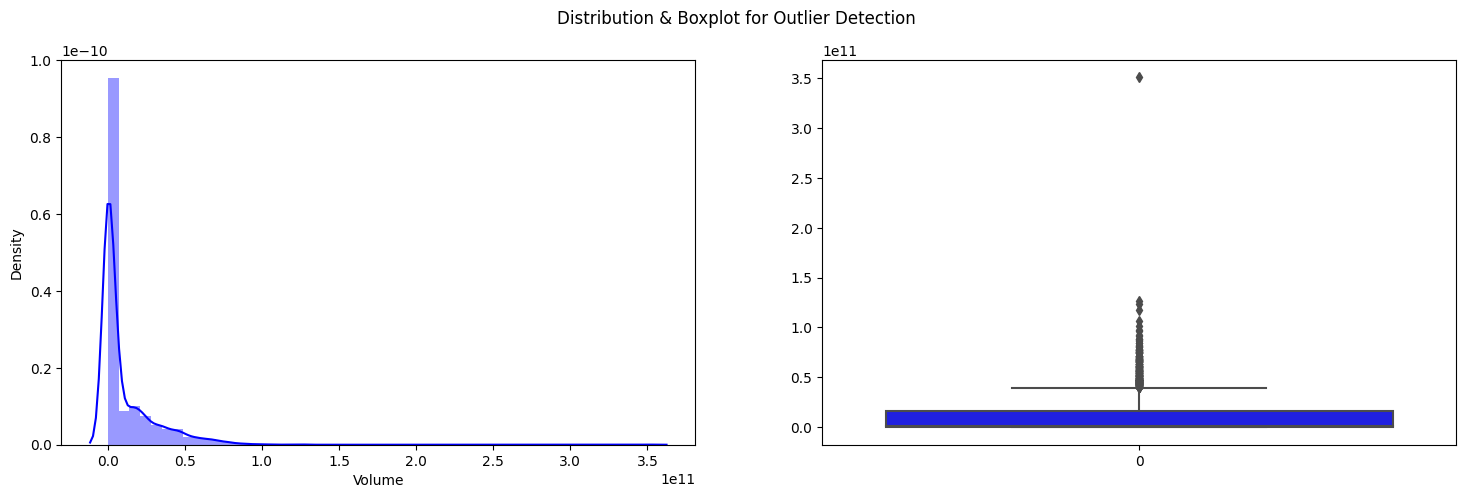

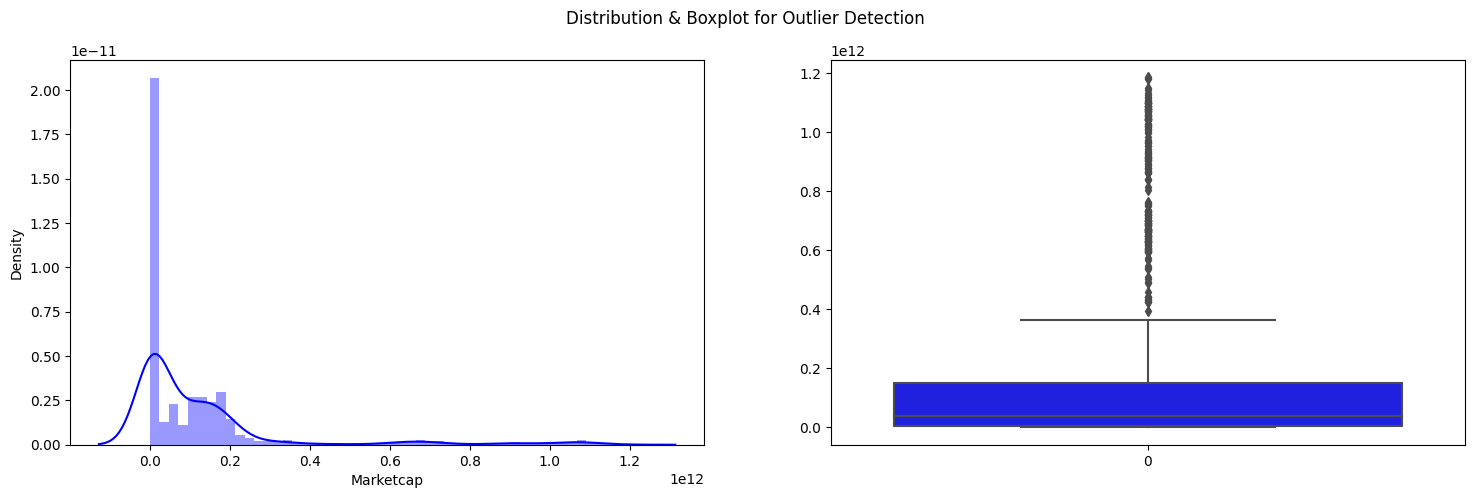

In [27]:
numeric_columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
for i in numeric_columns:
    get_distribution_outlier(df_bt[i])

### Cardano price over Years

In [28]:
df_cd = df[df["Name"]=="Cardano"]
df_cd.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
2991,Cardano,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
2992,Cardano,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2993,Cardano,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
2994,Cardano,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
2995,Cardano,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [29]:
df_cd.set_index('Date', inplace=True)

In [30]:
df_cd.describe()

,High,Low,Open,Close,Volume,Marketcap
count,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03,1.374000e+03
mean,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09
std,0.433523,0.380928,0.408456,0.409691,2.107653e+09,1.303878e+10
min,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,0.047565,0.044601,0.045898,0.045947,5.014830e+07,1.191263e+09
50%,0.090274,0.083164,0.086867,0.087002,1.186742e+08,2.270889e+09
75%,0.194519,0.172442,0.181374,0.183379,4.875977e+08,5.174547e+09
max,2.461766,2.013285,2.300190,2.309113,1.914198e+10,7.377224e+10


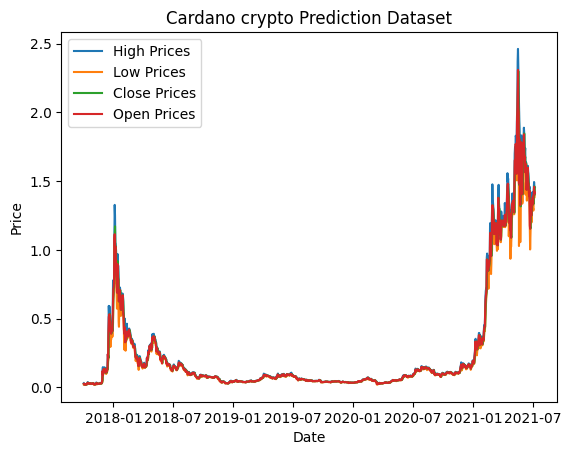

In [31]:
plt.plot(df_cd["High"], label='High Prices')
plt.plot(df_cd["Low"], label='Low Prices')
plt.plot(df_cd["Open"], label='Close Prices')
plt.plot(df_cd["Close"], label='Open Prices')
plt.title('Cardano crypto Prediction Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

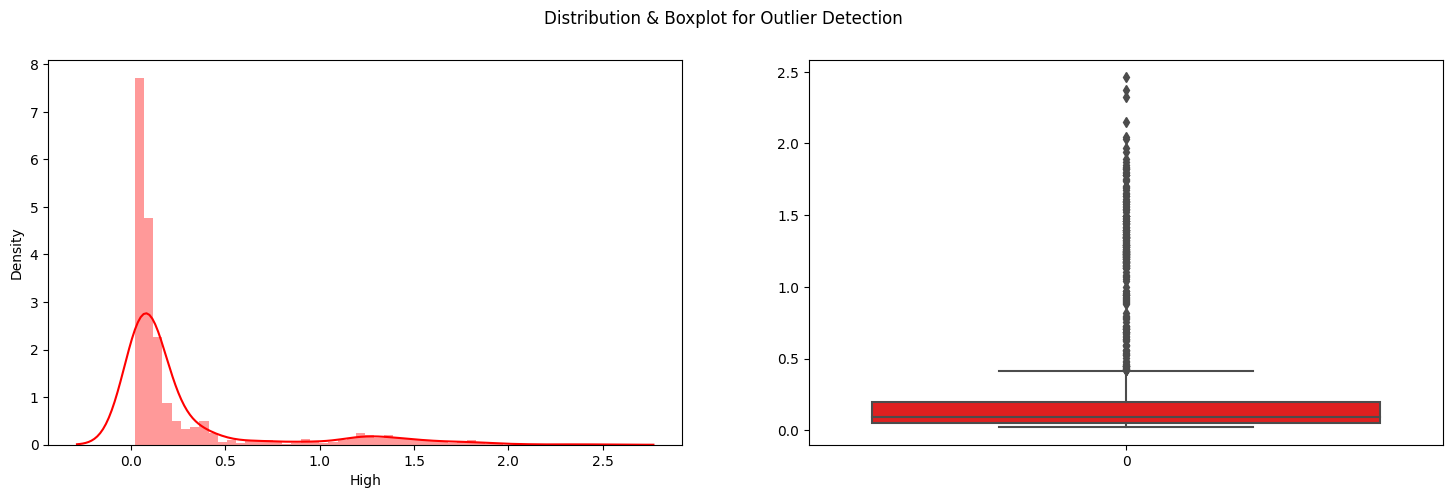

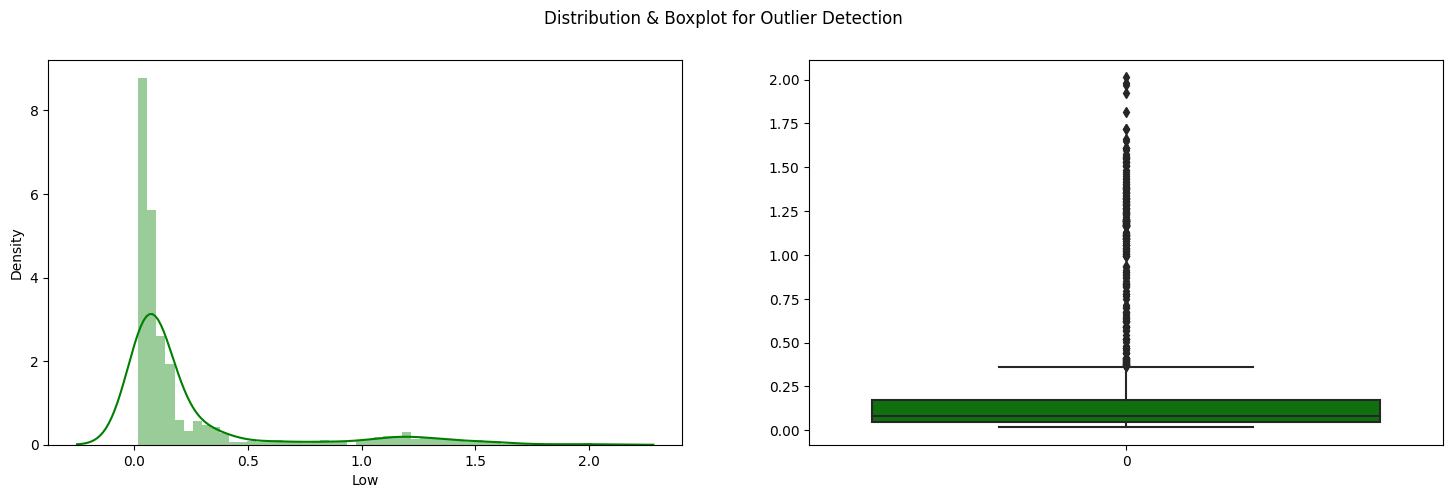

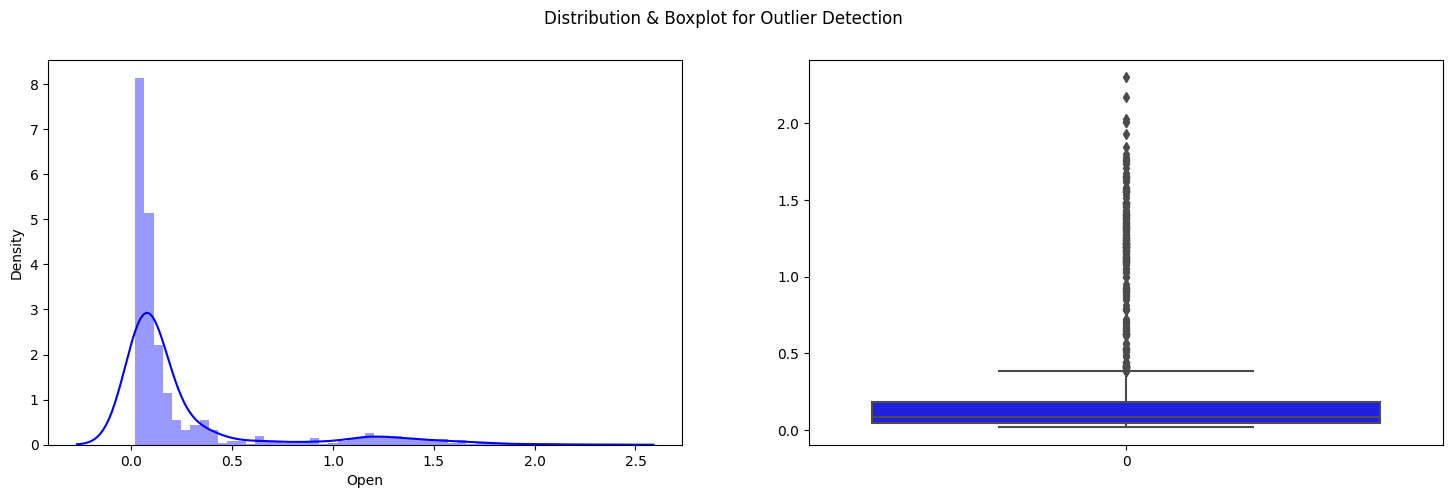

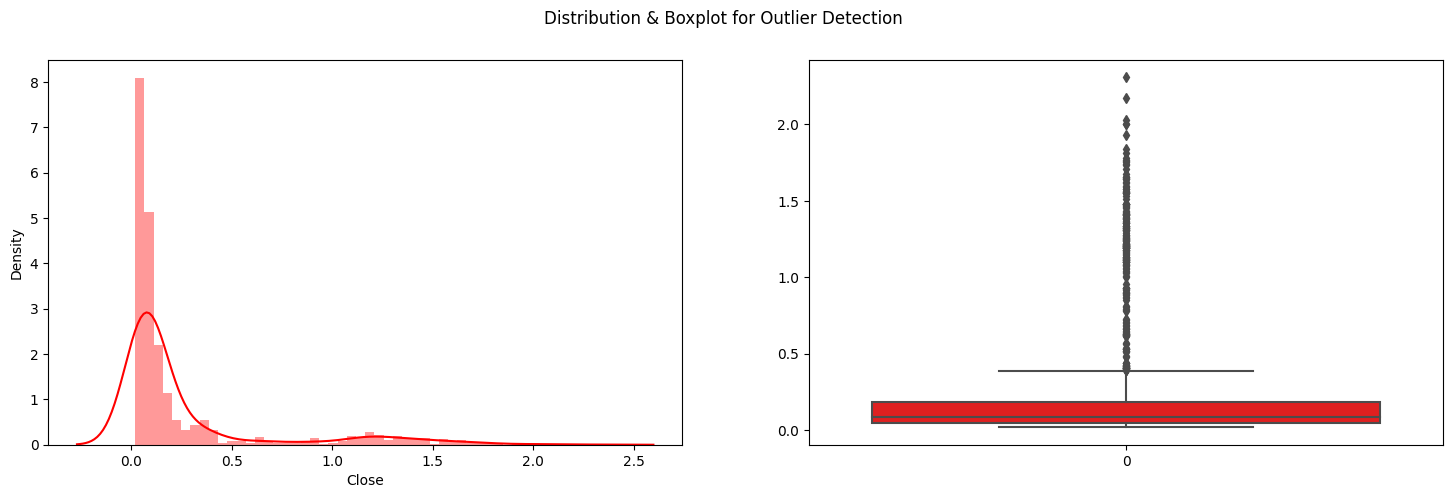

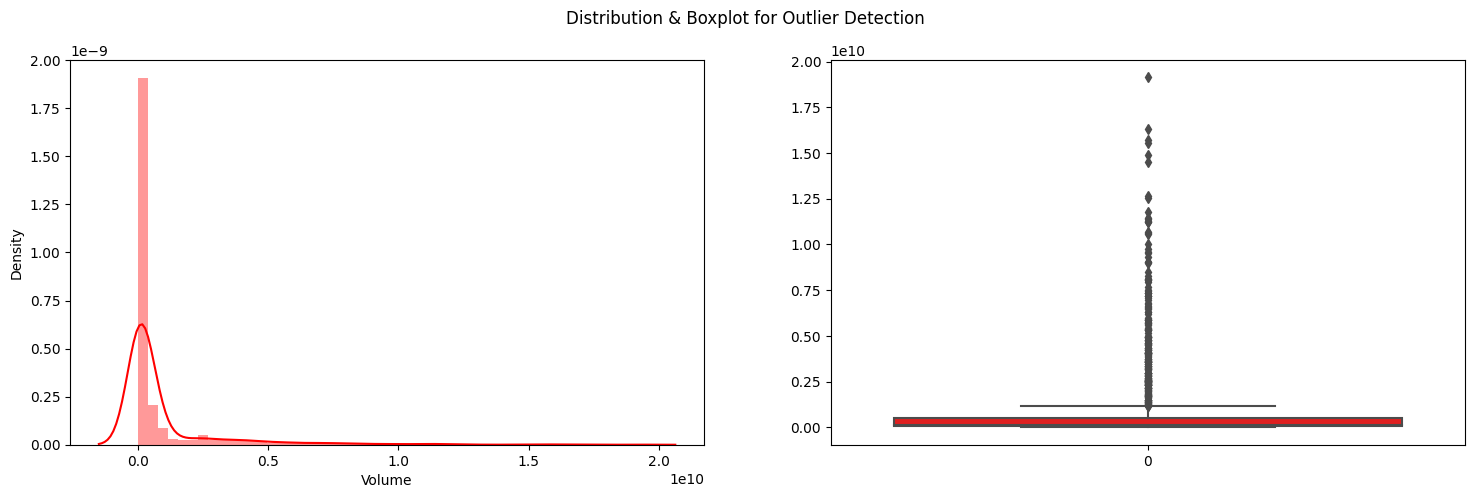

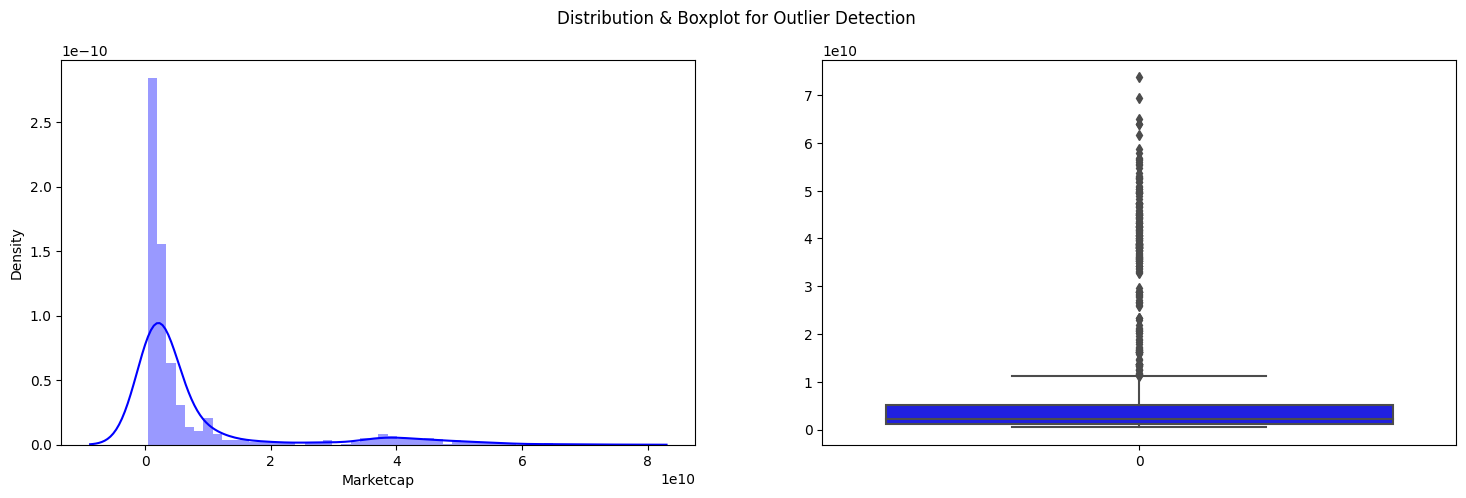

In [32]:
for i in numeric_columns:
    get_distribution_outlier(df_cd[i])

### Dogecoin price over years

In [33]:
df_dg = df[df["Name"]=="Dogecoin"]
df_dg.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
4365,Dogecoin,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
4366,Dogecoin,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
4367,Dogecoin,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
4368,Dogecoin,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4369,Dogecoin,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [34]:
df_dg.set_index('Date', inplace=True)

In [35]:
df_dg.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


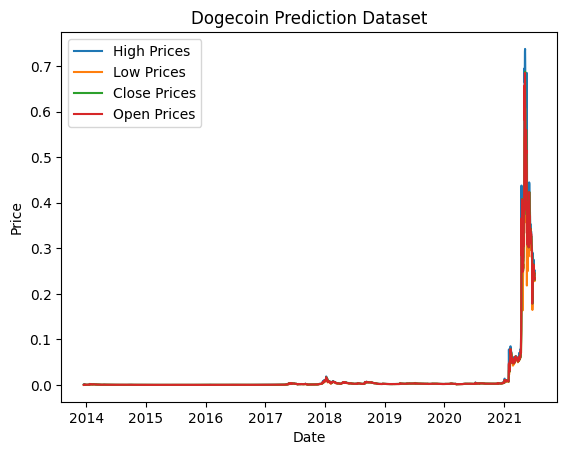

In [36]:
plt.plot(df_dg["High"], label='High Prices')
plt.plot(df_dg["Low"], label='Low Prices')
plt.plot(df_dg["Open"], label='Close Prices')
plt.plot(df_dg["Close"], label='Open Prices')
plt.title('Dogecoin Prediction Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

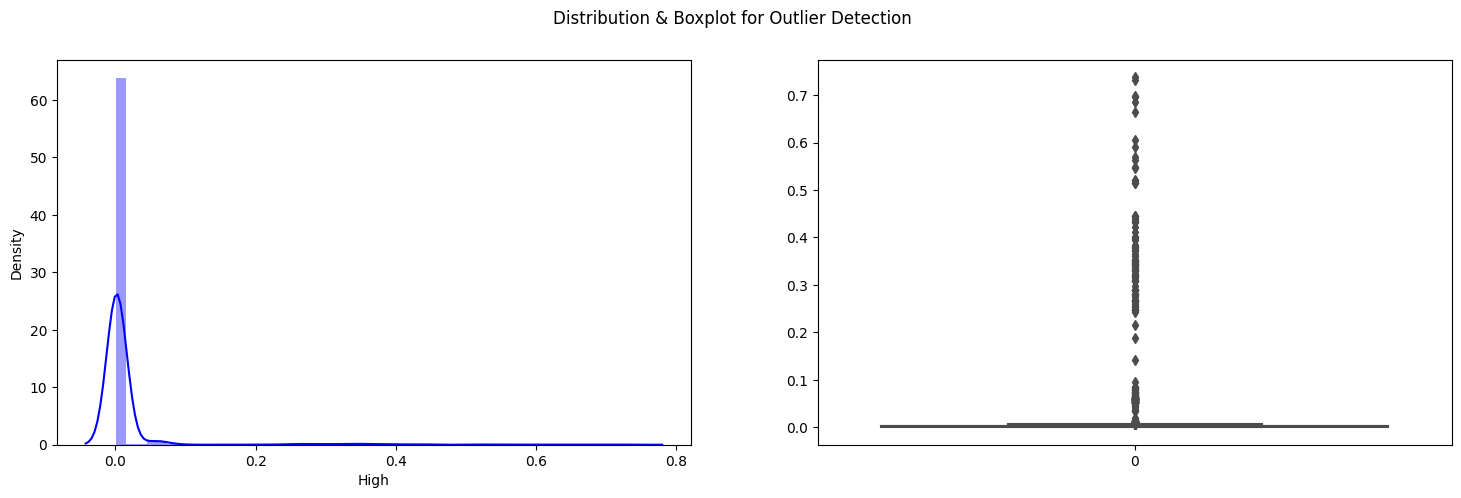

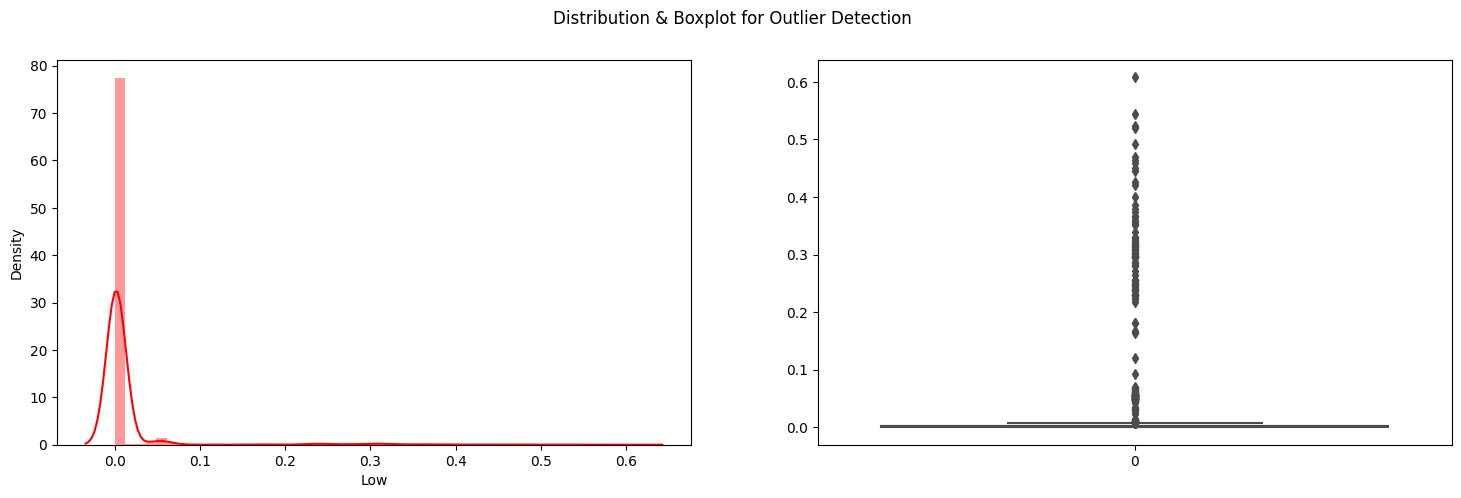

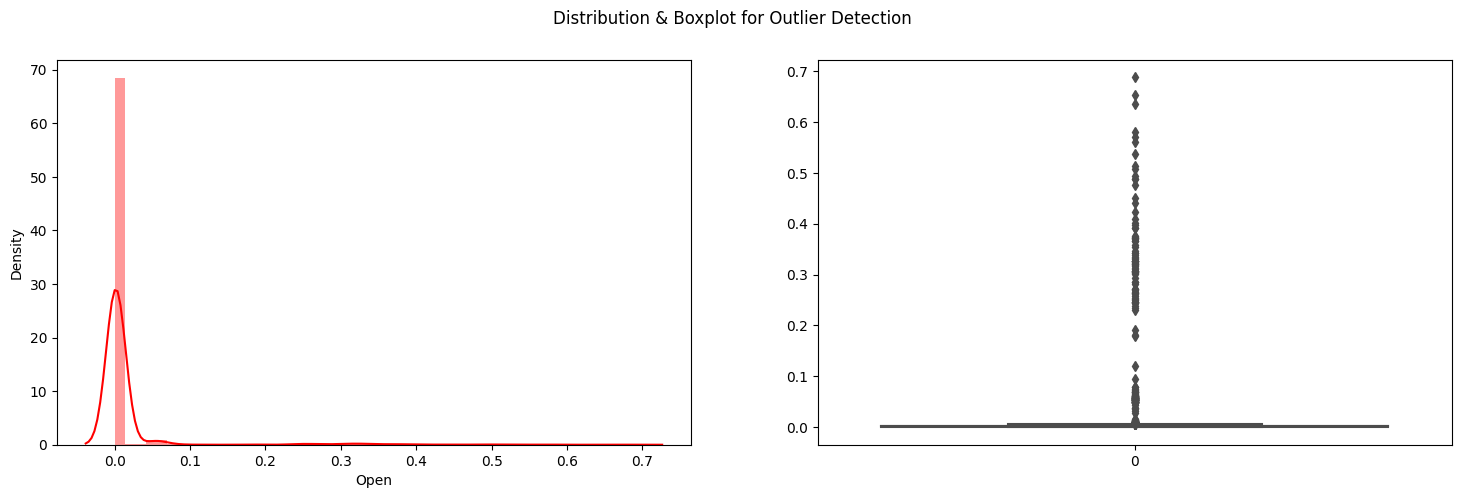

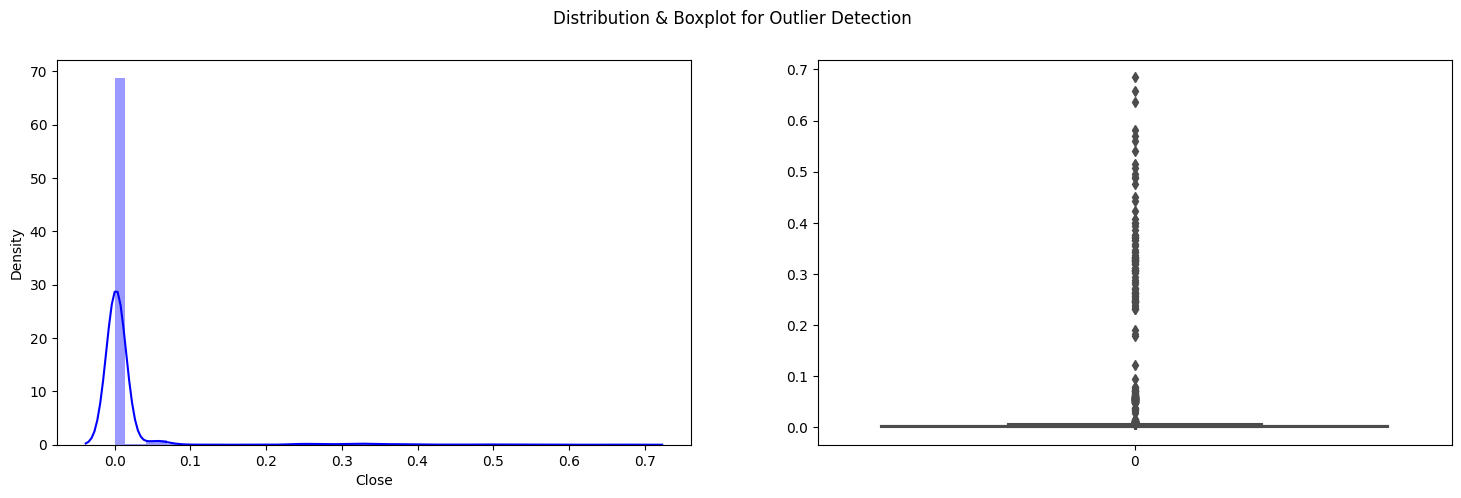

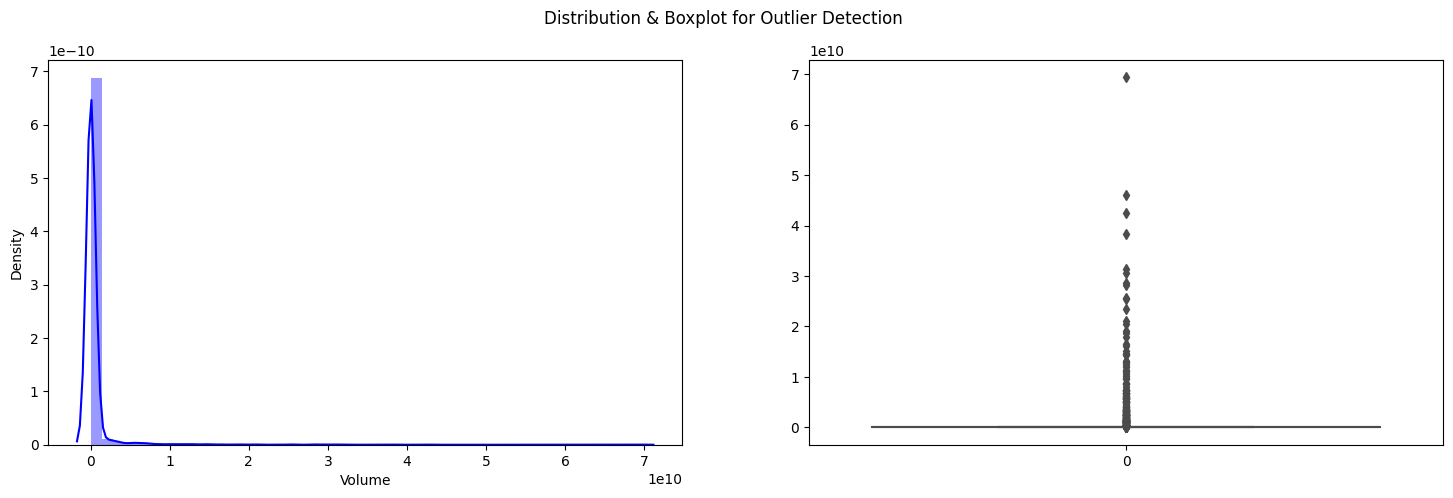

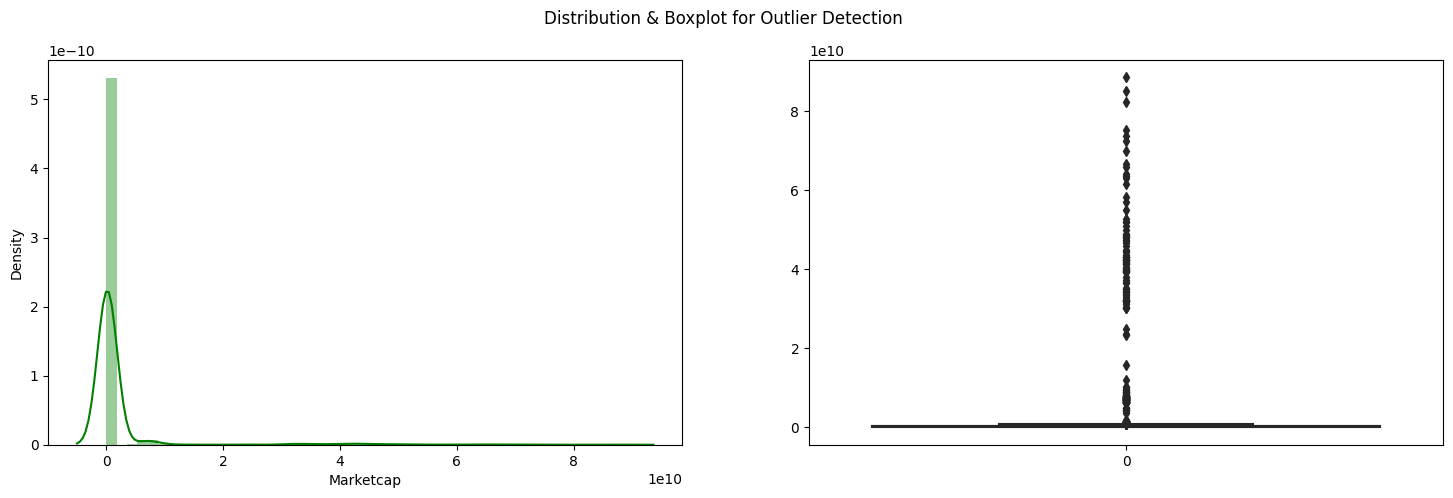

In [37]:
for i in numeric_columns:
    get_distribution_outlier(df_dg[i])

### Etherium price over years

In [38]:
df_et = df[df["Name"]=="Ethereum"]
df_et.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
7125,Ethereum,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
7126,Ethereum,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
7127,Ethereum,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
7128,Ethereum,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
7129,Ethereum,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [39]:
df_et.set_index('Date', inplace=True)

In [40]:
df_et.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


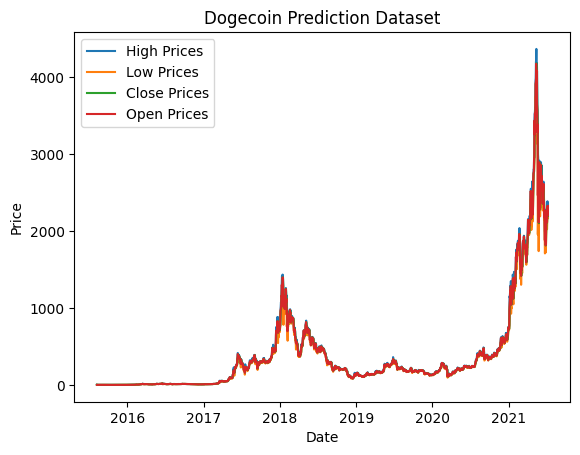

In [41]:
plt.plot(df_et["High"], label='High Prices')
plt.plot(df_et["Low"], label='Low Prices')
plt.plot(df_et["Open"], label='Close Prices')
plt.plot(df_et["Close"], label='Open Prices')
plt.title('Dogecoin Prediction Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

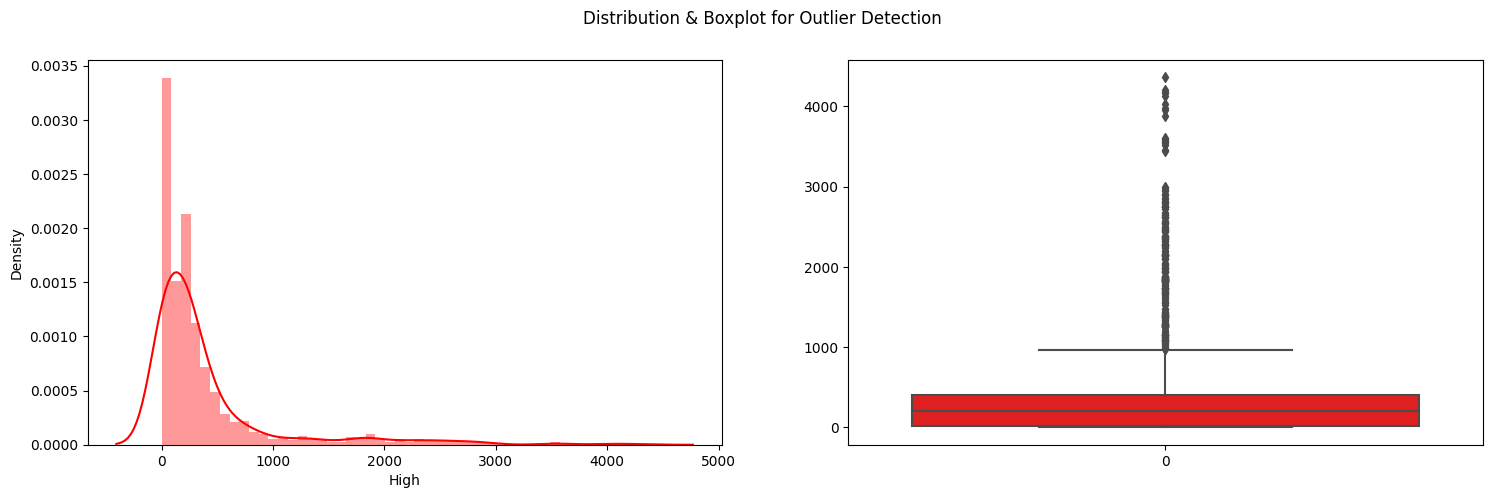

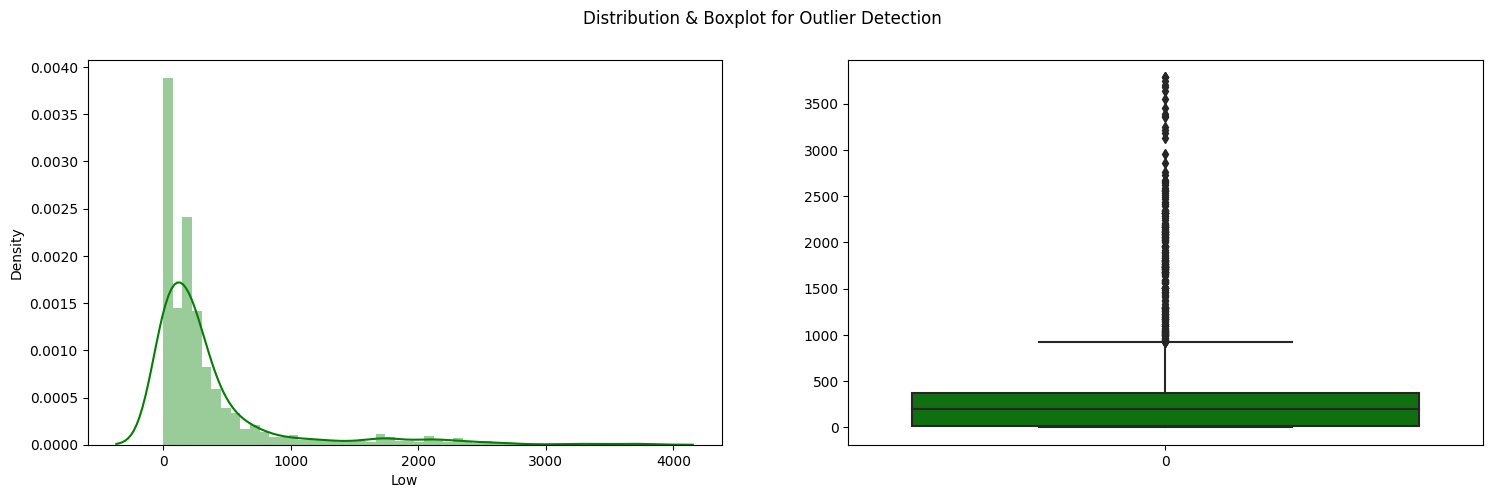

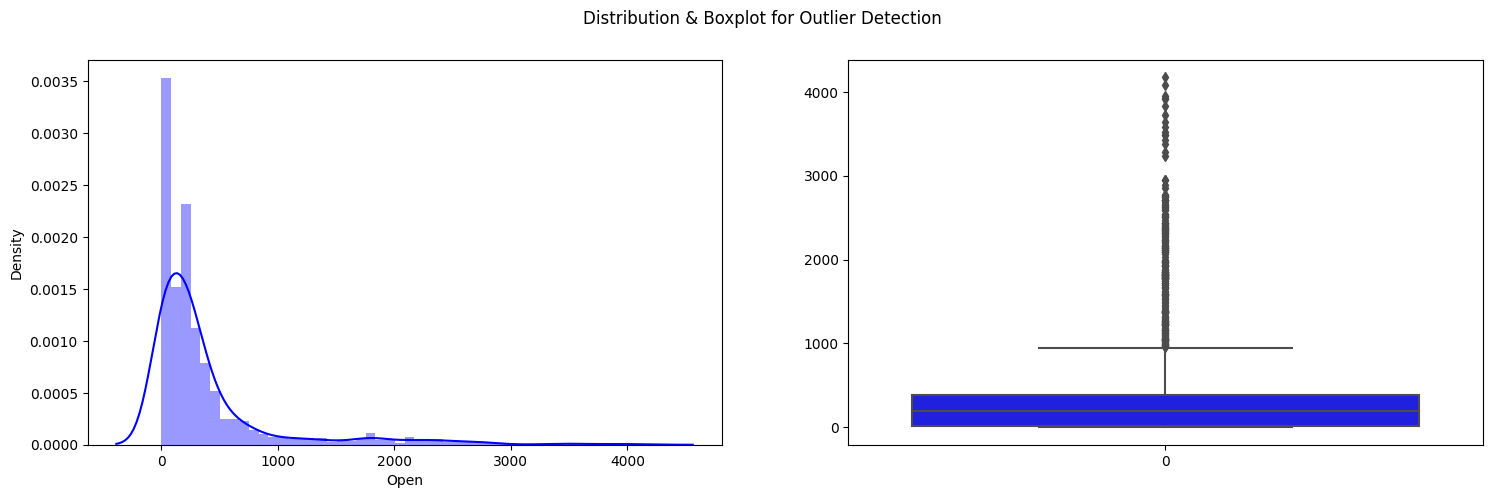

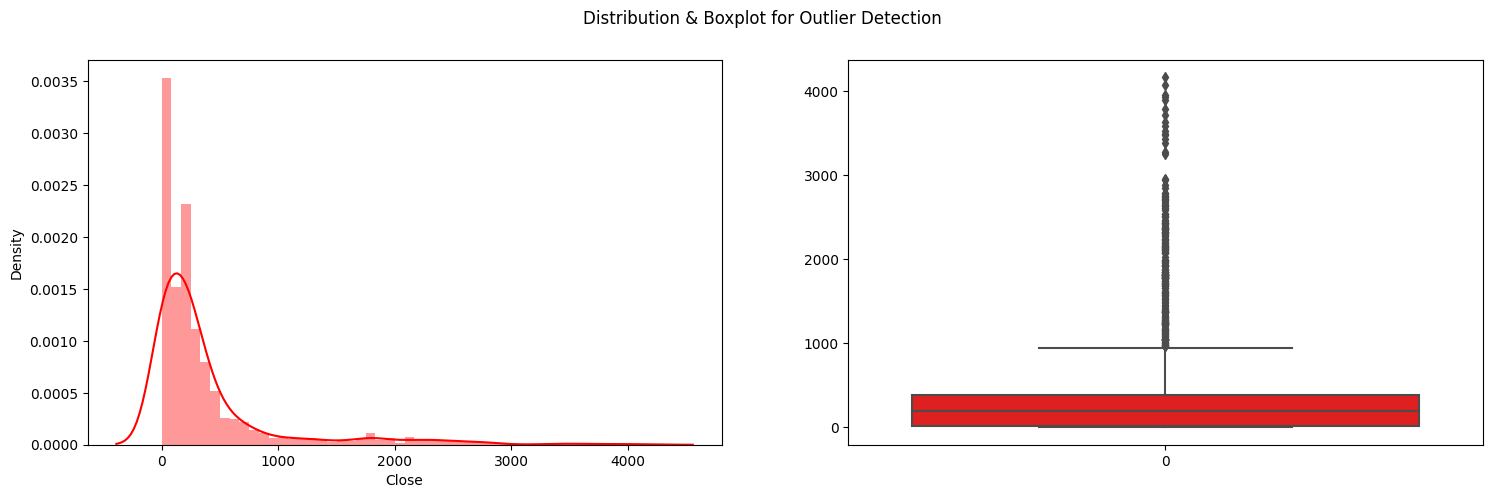

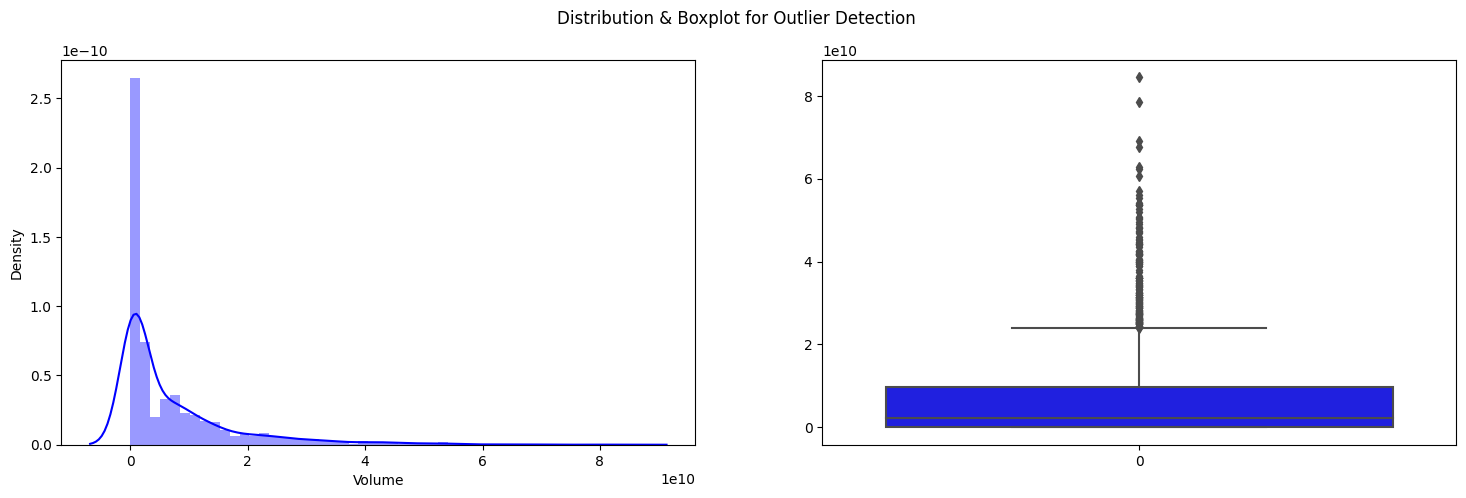

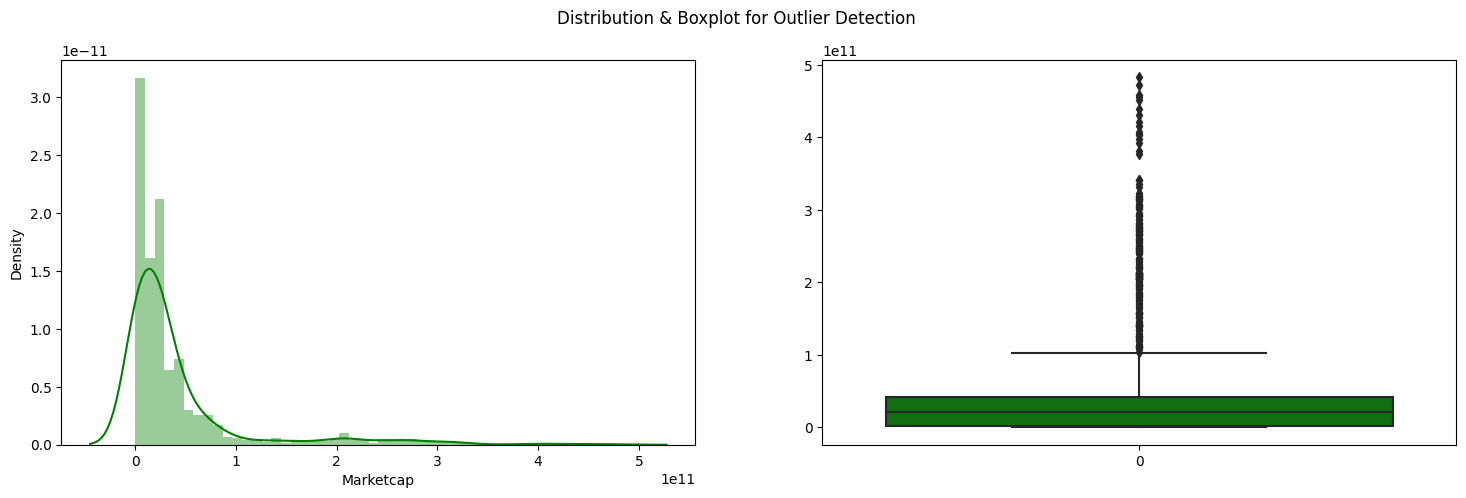

In [42]:
for i in numeric_columns:
    get_distribution_outlier(df_et[i])

# EDA by pandas profiling

In [43]:
# prof = ProfileReport(df)
# prof.to_file(output_file='EDA_profile_crptocurrency_dataset.html')

# Feature Encoding

In [44]:
df["Name"].unique()

array(['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum'], dtype=object)

In [45]:
oe = OrdinalEncoder(categories=[['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum']])
df["Name"] = oe.fit_transform(df[["Name"]])

In [46]:
df["Name"].unique()

array([0., 1., 2., 3.])

# Checking Assumptions of regression 

### Checking for Linearity

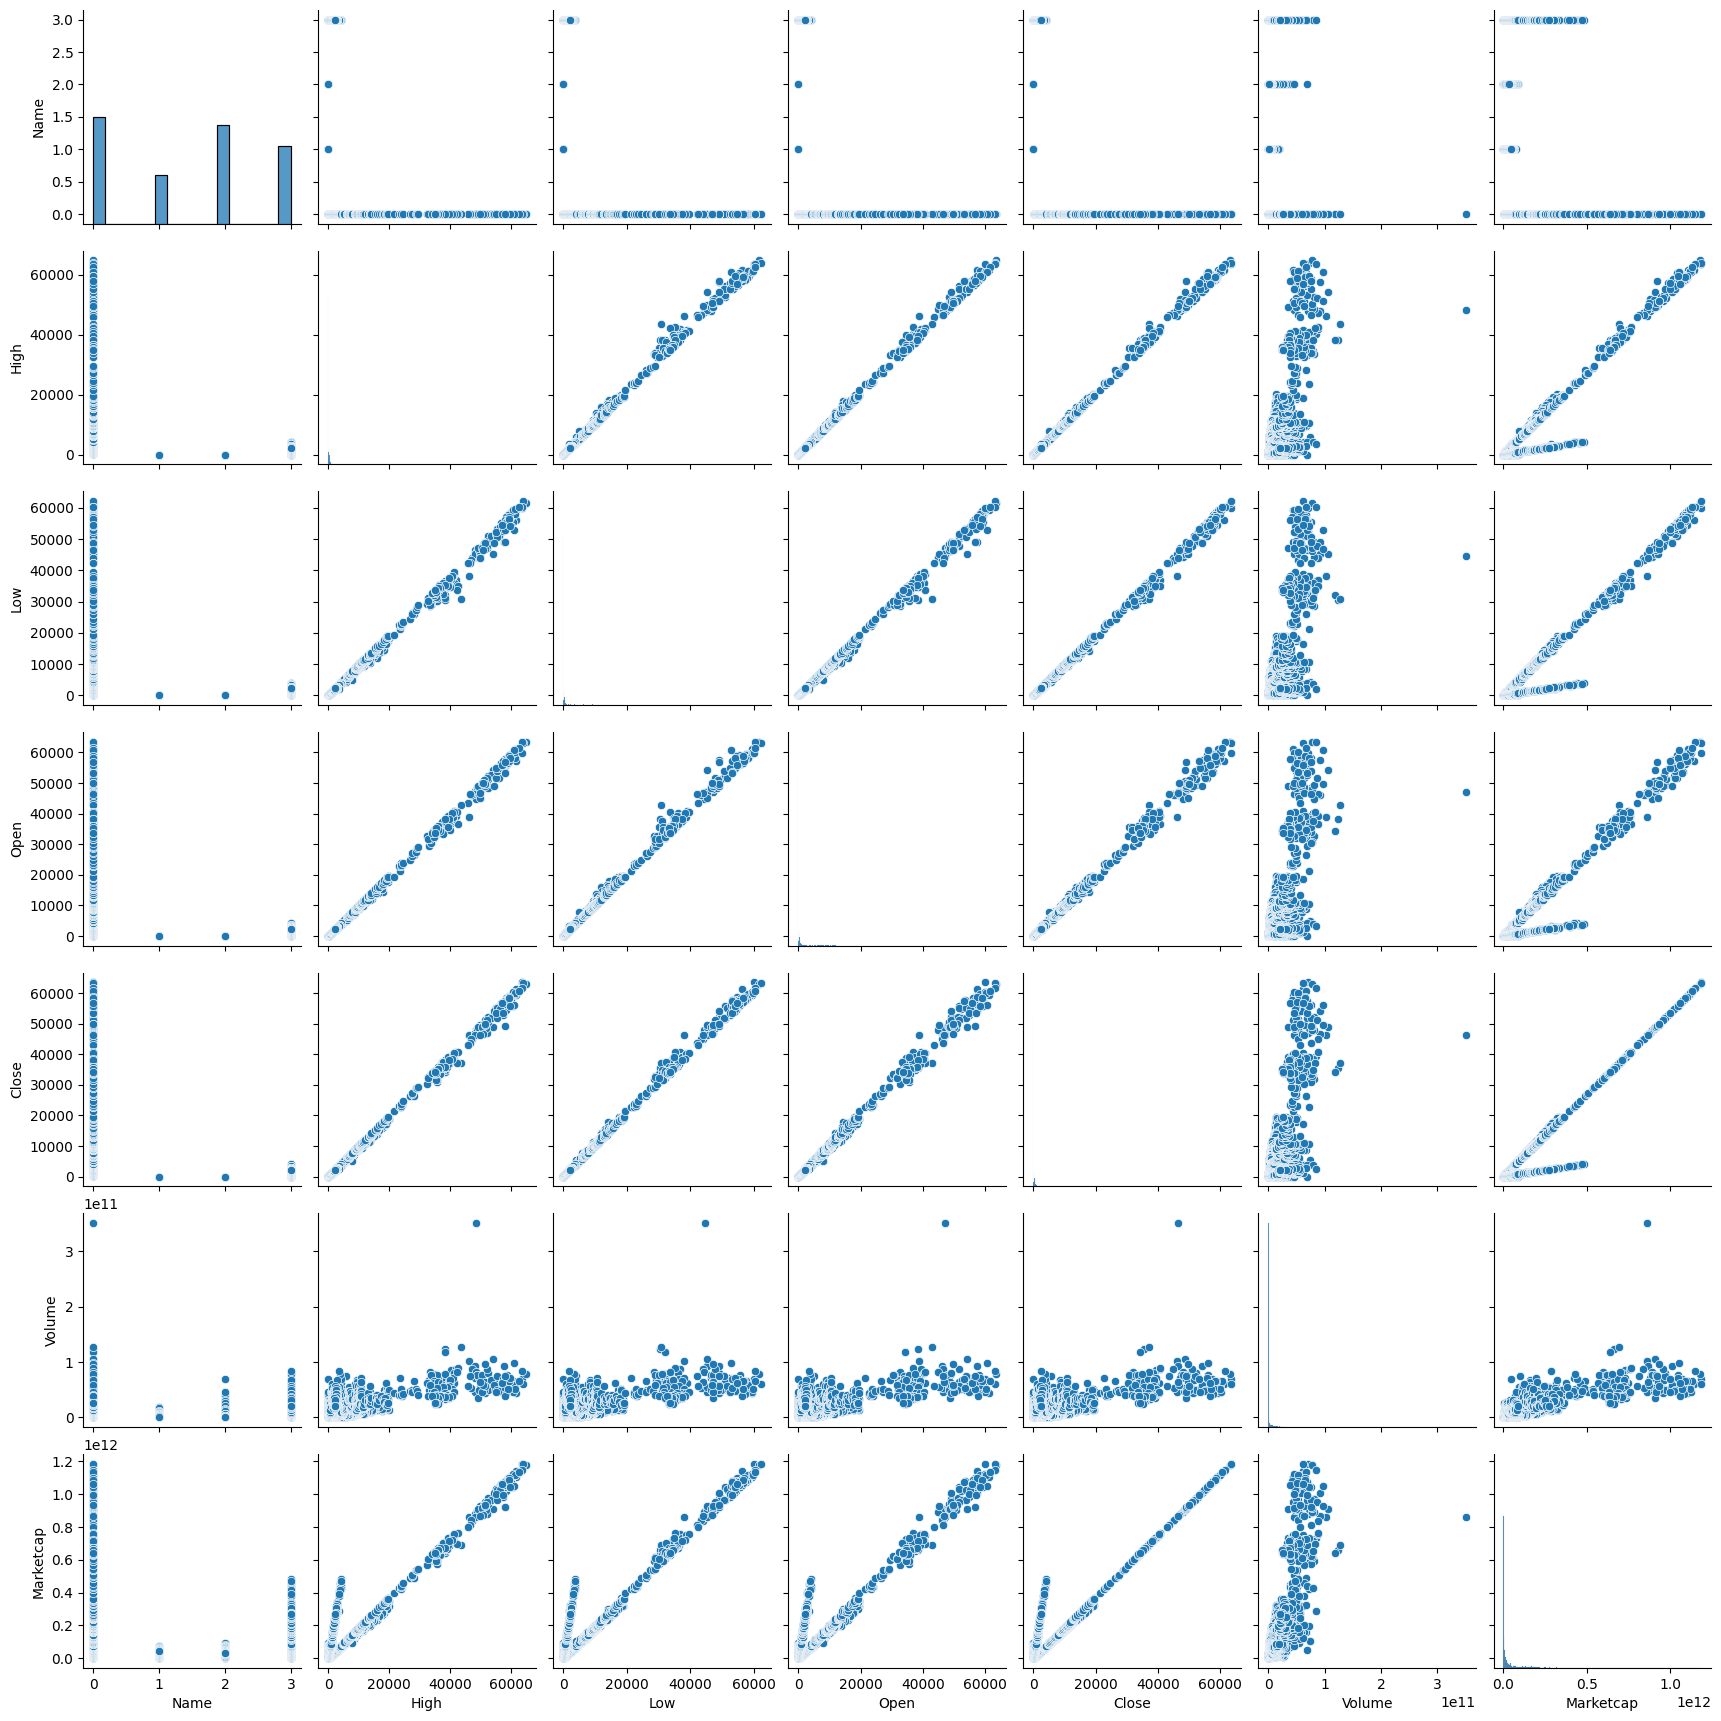

In [47]:
sns.pairplot(df)

In [48]:
df.corr()

,Name,High,Low,Open,Close,Volume,Marketcap
Name,1.000000,-0.357772,-0.360473,-0.358688,-0.358895,-0.166227,-0.262852
High,-0.357772,1.000000,0.999049,0.999544,0.999523,0.753469,0.970178
Low,-0.360473,0.999049,1.000000,0.999105,0.999421,0.747158,0.969634
Open,-0.358688,0.999544,0.999105,1.000000,0.998896,0.751644,0.969377
Close,-0.358895,0.999523,0.999421,0.998896,1.000000,0.750828,0.970472
Volume,-0.166227,0.753469,0.747158,0.751644,0.750828,1.000000,0.812111
Marketcap,-0.262852,0.970178,0.969634,0.969377,0.970472,0.812111,1.000000


<AxesSubplot: >

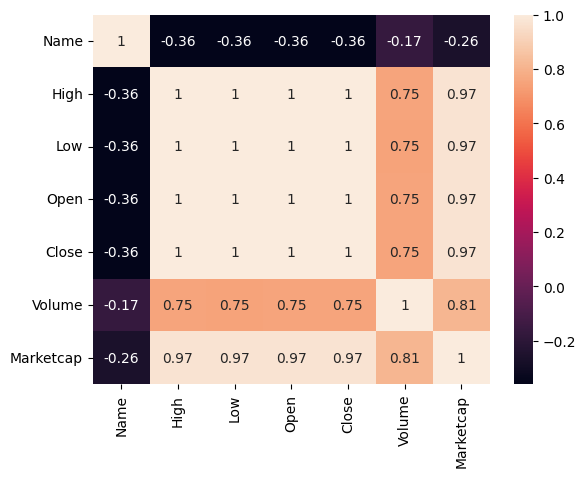

In [49]:
sns.heatmap(df.corr(),annot=True)

# Scaling of Data

In [50]:
df.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,0.0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,0.0,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,0.0,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,0.0,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,0.0,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [51]:
df['Date_year'] =df["Date"].dt.year
df['Date_month'] =df["Date"].dt.month
df['Date_day'] =df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)

In [52]:
df.dtypes

Name          float64
High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Marketcap     float64
Date_year       int64
Date_month      int64
Date_day        int64
dtype: object

In [53]:
x = df.drop("Close",axis=1)
y = df["Close"]

In [54]:
rs_model = RobustScaler()
x_array = rs_model.fit_transform(x)
x = pd.DataFrame(x_array,columns=x.columns)

# Train Test Split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=45)

In [56]:
x_train.shape,x_test.shape

((7428, 9), (1857, 9))

# Model Training

## LR Model

In [57]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [58]:
#Evaluation on training data
y_pred = lr_model.predict(x_train)

LR_train_MAE = mean_absolute_error(y_train,y_pred)
print("The mean absolute error >>",LR_train_MAE)

LR_train_MSE = mean_squared_error(y_train,y_pred)
print("The mean Squared error >>",LR_train_MSE)

LR_train_RMSE = np.sqrt(LR_train_MSE)
print("The RMSE value >>",LR_train_RMSE)

LR_train_R2 = r2_score(y_train,y_pred)
print("The R2 value >>",LR_train_R2) 

The mean absolute error >> 33.71262643065206
The mean Squared error >> 19987.439188667617
The RMSE value >> 141.37694008807665
The R2 value >> 0.9995985801766372


In [59]:
#Evaluation on testing data
y_pred = lr_model.predict(x_test)

LR_test_MAE = mean_absolute_error(y_test,y_pred)
print("The mean absolute error >>",LR_test_MAE)

LR_test_MSE = mean_squared_error(y_test,y_pred)
print("The mean Squared error >>",LR_test_MSE)

LR_test_RMSE = np.sqrt(LR_test_MSE)
print("The RMSE value >>",LR_test_RMSE)

LR_test_R2 = r2_score(y_test,y_pred)
print("The R2 value >>",LR_test_R2)

The mean absolute error >> 31.80144991143439
The mean Squared error >> 12888.572760888033
The RMSE value >> 113.52785015531666
The R2 value >> 0.9997619955350782


## DT Model

In [60]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

### Model Evaluation 

In [61]:
#Evaluation on training data
y_pred = dt_model.predict(x_train)

DT_train_MAE = mean_absolute_error(y_train,y_pred)
print("The mean absolute error >>",DT_train_MAE)

DT_train_MSE = mean_squared_error(y_train,y_pred)
print("The mean Squared error >>",DT_train_MSE)

DT_train_RMSE = np.sqrt(DT_train_MSE)
print("The RMSE value >>",DT_train_RMSE)

DT_train_R2 = r2_score(y_train,y_pred)
print("The R2 value >>",DT_train_R2)

The mean absolute error >> 2.7251553365668387e-11
The mean Squared error >> 2.5417328751442925e-19
The RMSE value >> 5.04156015053306e-10
The R2 value >> 1.0


In [62]:
#Evaluation on testing data
y_pred = dt_model.predict(x_test)

DT_test_MAE = mean_absolute_error(y_test,y_pred)
print("The mean absolute error >>",DT_test_MAE)

DT_test_MSE = mean_squared_error(y_test,y_pred)
print("The mean Squared error >>",DT_test_MSE)

DT_test_RMSE = np.sqrt(DT_test_MSE)
print("The RMSE value >>",DT_test_RMSE)

DT_test_R2 = r2_score(y_test,y_pred)
print("The R2 value >>",DT_test_R2)

The mean absolute error >> 30.329031119087983
The mean Squared error >> 15420.663889544086
The RMSE value >> 124.17996573338264
The R2 value >> 0.9997152371386763


## RF Model 

In [63]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

### Model Evaluation

In [64]:
#Evaluation on training data
y_pred = rf_model.predict(x_train)

RF_train_MAE = mean_absolute_error(y_train,y_pred)
print("The mean absolute error >>",RF_train_MAE)

RF_train_MSE = mean_squared_error(y_train,y_pred)
print("The mean Squared error >>",RF_train_MSE)

RF_train_RMSE = np.sqrt(RF_train_MSE)
print("The RMSE value >>",RF_train_RMSE)

RF_train_R2 = r2_score(y_train,y_pred)
print("The R2 value >>",RF_train_R2)

The mean absolute error >> 8.24604536438033
The mean Squared error >> 1156.1400046576227
The RMSE value >> 34.00205882968887
The R2 value >> 0.9999767805414155


In [65]:
#Evaluation on testing data
y_pred = rf_model.predict(x_test)

RF_test_MAE = mean_absolute_error(y_test,y_pred)
print("The mean absolute error >>",RF_test_MAE)

RF_test_MSE = mean_squared_error(y_test,y_pred)
print("The mean Squared error >>",RF_test_MSE)

RF_test_RMSE = np.sqrt(RF_test_MSE)
print("The RMSE value >>",RF_test_RMSE)

RF_test_R2 = r2_score(y_test,y_pred)
print("The R2 value >>",RF_test_R2)

The mean absolute error >> 21.974745465170667
The mean Squared error >> 8490.701176467166
The RMSE value >> 92.14500082189574
The R2 value >> 0.999843208024053


## Hyperparameter Tuning 

In [66]:
# rf_model = RandomForestRegressor()
# hyper_parameter = {"criterion":["squared_error", "absolute_error"],
#                    "max_depth":np.arange(3,7),
#                    "min_samples_split":np.arange(3,7),
#                    "min_samples_leaf":np.arange(3,7)}

# rscv = RandomizedSearchCV(rf_model,hyper_parameter,cv=5)
# rscv.fit(x_train,y_train)

In [67]:
# rscv_rf.best_estimator_

## XGB Model

In [68]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
#Evaluation on training data
y_pred = xgb_model.predict(x_train)

XGB_train_MAE = mean_absolute_error(y_train,y_pred)
print("The mean absolute error >>",XGB_train_MAE)

XGB_train_MSE = mean_squared_error(y_train,y_pred)
print("The mean Squared error >>",XGB_train_MSE)

XGB_train_RMSE = np.sqrt(XGB_train_MSE)
print("The RMSE value >>",XGB_train_RMSE)

XGB_train_R2 = r2_score(y_train,y_pred)
print("The R2 value >>",XGB_train_R2)

The mean absolute error >> 5.694480334062961
The mean Squared error >> 150.0955526201222
The RMSE value >> 12.251349012256657
The R2 value >> 0.999996985540286


In [70]:
#Evaluation on testing data
y_pred = xgb_model.predict(x_test)

XGB_test_MAE = mean_absolute_error(y_test,y_pred)
print("The mean absolute error >>",XGB_test_MAE)

XGB_test_MSE = mean_squared_error(y_test,y_pred)
print("The mean Squared error >>",XGB_test_MSE)

XGB_test_RMSE = np.sqrt(XGB_test_MSE)
print("The RMSE value >>",XGB_test_RMSE)

XGB_test_R2 = r2_score(y_test,y_pred)
print("The R2 value >>",XGB_test_R2)

The mean absolute error >> 30.114822316476978
The mean Squared error >> 14209.333800933726
The RMSE value >> 119.20291020329044
The R2 value >> 0.9997376059435805


# Comparison of Model results 

### MAE Value Comparison

In [71]:
result_MAE = pd.DataFrame({"Model_name":["LR_model","DT_model","RF_model","XGB_model"],
                       "MAE_value_train":[LR_train_MAE,DT_train_MAE,RF_train_MAE,XGB_train_MAE],
                       "MAE_value_test":[LR_test_MAE,DT_test_MAE,RF_test_MAE,XGB_test_MAE]})


<AxesSubplot: xlabel='Model_name'>

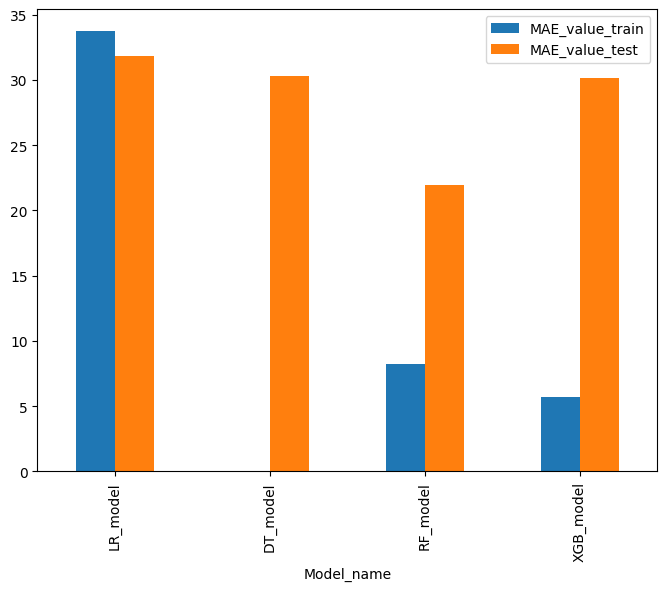

In [72]:
result_MAE.plot(x="Model_name",y=["MAE_value_train","MAE_value_test"],kind="bar",figsize=(8,6))

### RMSE value comparison

In [73]:
result_RMSE = pd.DataFrame({"Model_name":["LR_model","DT_model","RF_model","XGB_model"],
                       "RMSE_value_train":[LR_train_RMSE,DT_train_RMSE,RF_train_RMSE,XGB_train_RMSE],
                       "RMSE_value_test":[LR_test_RMSE,DT_test_RMSE,RF_test_RMSE,XGB_test_RMSE]})
result_RMSE

,Model_name,RMSE_value_train,RMSE_value_test
0,LR_model,1.413769e+02,113.527850
1,DT_model,5.041560e-10,124.179966
2,RF_model,3.400206e+01,92.145001
3,XGB_model,1.225135e+01,119.202910


<AxesSubplot: xlabel='Model_name'>

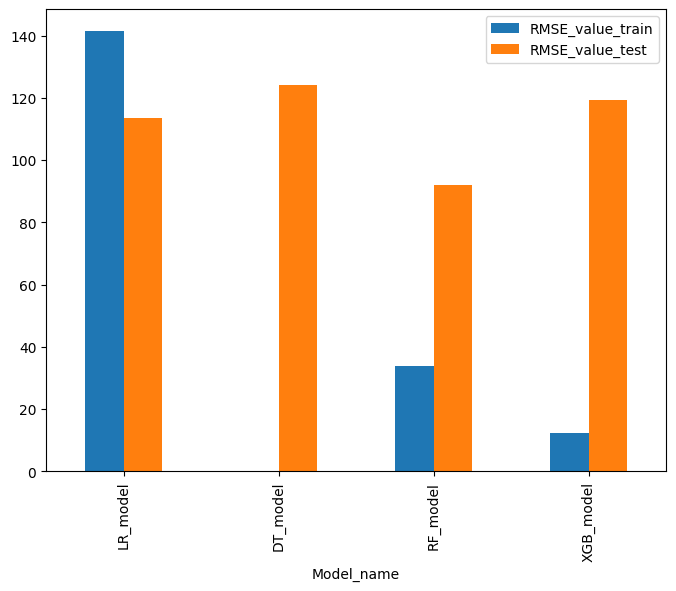

In [74]:
result_RMSE.plot(x="Model_name",y=["RMSE_value_train","RMSE_value_test"],kind="bar",figsize=(8,6))

### Accuracy comparison for each model

In [93]:
result_r2 = pd.DataFrame({"Model_name":["LR_model","DT_model","RF_model","XGB_model"],
                       "r2_value_train":[LR_train_R2,DT_train_R2,RF_train_R2,XGB_train_R2],
                       "r2_value_test":[LR_test_R2,DT_test_R2,RF_test_R2,XGB_test_R2]})
result_r2

,Model_name,r2_value_train,r2_value_test
0,LR_model,0.999599,0.999762
1,DT_model,1.000000,0.999715
2,RF_model,0.999977,0.999843
3,XGB_model,0.999997,0.999738


<AxesSubplot: xlabel='Model_name'>

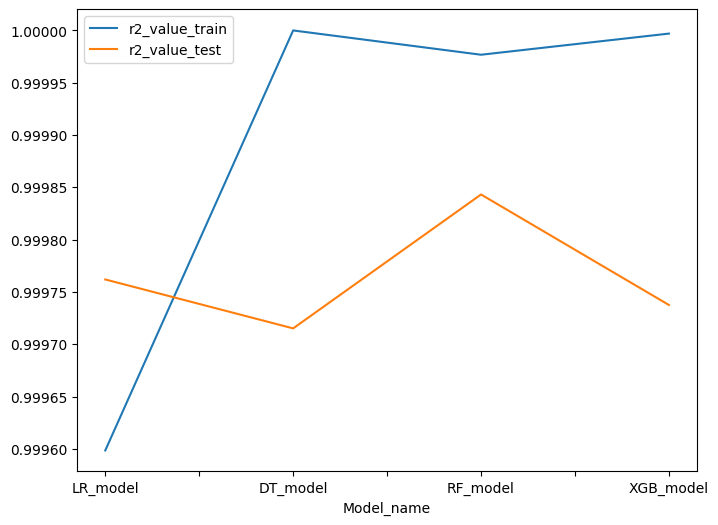

In [92]:
result_r2.plot(x="Model_name",y=["r2_value_train","r2_value_test"],kind="line",figsize=(8,6))

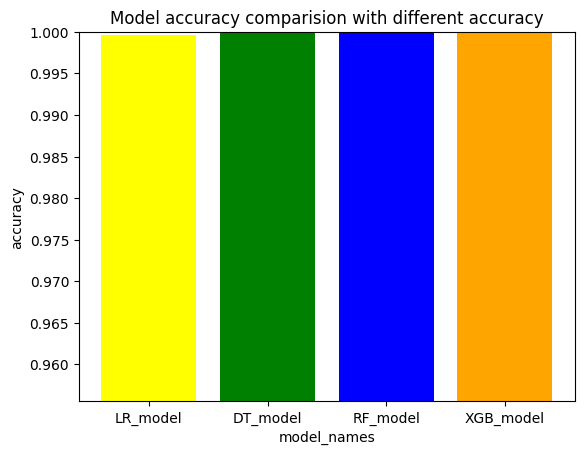

In [96]:
model_names = ["LR_model","DT_model","RF_model","XGB_model"]
accuracy = [0.999599,1.000000,0.999977,0.999997]
colors = ['yellow', 'green', 'blue', 'orange']

plt.bar(model_names, accuracy, color=colors)

# Add labels and title
plt.ylim(0.95555, 1)
plt.xlabel('model_names')
plt.ylabel('accuracy')
plt.title('Model accuracy comparision with different accuracy')

# Show the plot
plt.show()

# Pickle Files 

In [77]:
import json
import pickle

In [78]:
#Feature Name JSON File
features = {"coin_name":{'Bitcoin':0, 'Cardano':1, 'Dogecoin':2, 'Ethereum':3}"feature_names":list(x_train.columns)}


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2641063374.py, line 2)

In [ ]:
with open("features_names.json","w") as f:
    json.dump(features,f)

In [ ]:
with open("lr_model.pkl","wb") as f:
    pickle.dump(lr_model,f)

In [ ]:
with open("robust_scaling.pkl","wb") as f:
    pickle.dump(rs_model,f)

In [ ]:
ts = df.sample().drop("Close",axis=1)
ts

In [ ]:
df.iloc[8143]["Close"]

In [ ]:
test_sample = rs_model.transform(ts.to_numpy())
test_sample

# Taking Input and predicting Close Price

In [ ]:
x_test.columns

In [80]:
def get_predicted_value(name,dt,high_value,low_value,open_value,volume,marketcap):
    dt = datetime.datetime.strptime(dt,"%Y-%m-%d").date()
    dt_year = int(dt.year)
    dt_month = int(dt.month)
    dt_day = int(dt.day)
    if name == "BT":
        name = 0
    elif name == "CD":
        name = 1
    elif name == "DG":
        name = 2
    elif name == "ET":
        name = 3
    else :
        pass
    test_array = np.array([name,high_value,low_value,open_value,volume,marketcap,dt_year,dt_month,dt_day])
    scaled_test_array = rs_model.transform([test_array])
    close_value = lr_model.predict(scaled_test_array)
    return f"Predicted closing price for given cyptocurrency for given date is :",close_value[0]

## Prediction of Cryptocurrency price

In [81]:
name = input("Give input as 'BT'-Bitcoin,'CD'-cardano,'DG'-dogecoin,'ET-Ethreum' : ")
dt = input("Input date in format YYYY-MM-DD : ")
high_value = input("Give highest value for given day : ")
low_value = input("Give lowest value for given day : ")
open_value = input("Give open value for given day : ")
volume = input("Give volume shared for given day : ")
marketcap = input("Give market capital for given coin : ")
op = get_predicted_value(name,dt,high_value,low_value,open_value,volume,marketcap)
print(op)

Give input as 'BT'-Bitcoin,'CD'-cardano,'DG'-dogecoin,'ET-Ethreum' : DG
Input date in format YYYY-MM-DD : 2023-04-04
Give highest value for given day : 190
Give lowest value for given day : 130
Give open value for given day : 150
Give volume shared for given day : 230
Give market capital for given coin : 10000
('Predicted closing price for given cyptocurrency for given date is :', 164.0049545812039)
